In [95]:
# knjiznice
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

## Uvoz podatkov **SEEDS_TP_A+_A-**

### Opisne statistike

In [96]:
# uvoz podatkov
data_A = pd.read_csv("SEEDS_TP_A+_A-.csv", index_col=0).iloc[1:,:]
data_A = data_A.apply(pd.to_numeric)
data_A.index = pd.to_datetime(data_A.index, format="%d/%m/%Y %H:%M")
data_A.index = pd.date_range(start=data_A.index[0], periods=len(data_A), freq="15T")

# statistika
data_A.describe()

,TP PRELAZ 056_A+_001,TP PRELAZ 056_A-_101,TP CELJSKA CESTA 2694_A+_201,TP CELJSKA CESTA 2694_A-_301,TP BENCINSKI SERVIS 3 2781_A+_401,TP BENCINSKI SERVIS 3 2781_A-_501
count,46652.0,46652.0,46652.000000,46652.000000,46652.000000,46652.000000
mean,0.0,0.0,60.448902,0.069610,10.778372,0.209041
std,0.0,0.0,18.956633,1.005274,4.257817,1.581090
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,47.360000,0.000000,7.920000,0.000000
50%,0.0,0.0,58.160000,0.000000,10.320000,0.000000
75%,0.0,0.0,72.080000,0.000000,13.440000,0.000000
max,0.0,0.0,146.640000,35.920000,28.728000,24.708000


Vprašanje: Zakaj ima *TP CELJSKA CESTA 2694_A+_201* vrednosti med $[0.00, 146.64]$?

### Vizualizacija celotnih podatkov

Text(0.5, 0.98, 'Prikaz vseh podatkov - MOČ')

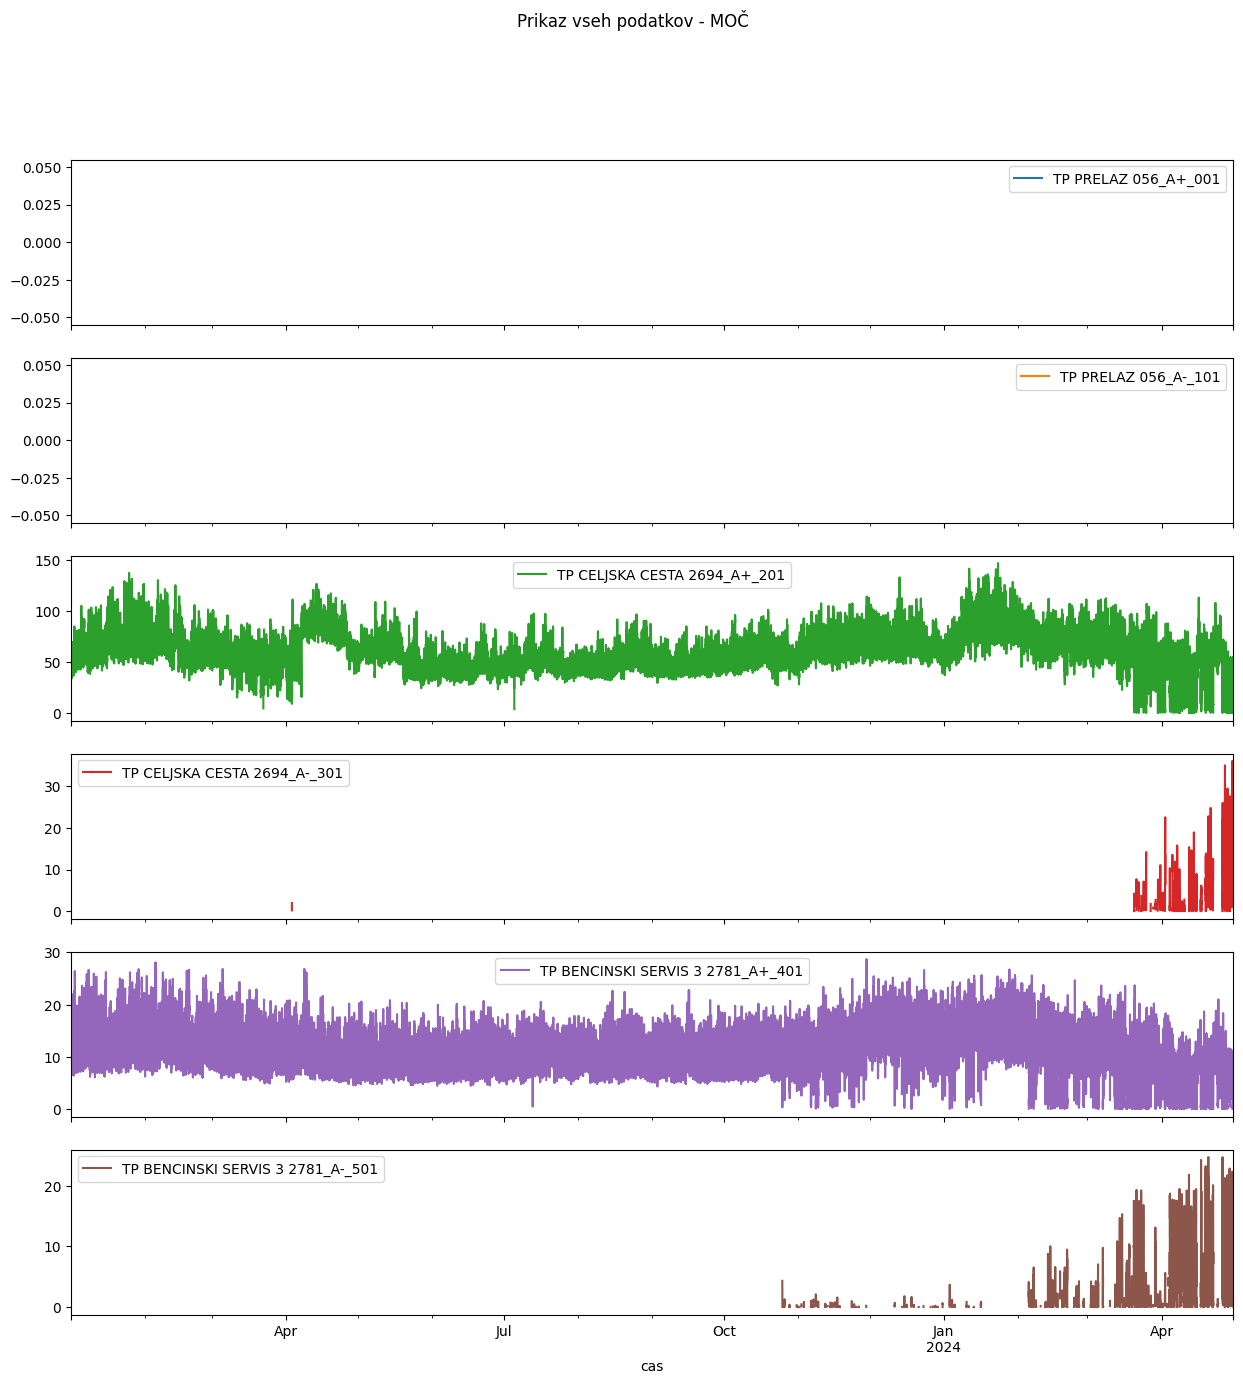

In [97]:
prikaz = data_A.replace(0, np.nan)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 15), sharex=True)
prikaz.plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz vseh podatkov - MOČ', fontsize=12) 

In [88]:
# si izberem podatke za 1 mesec
df = data_A[(data_A.index >= "2024-01-01")]
df["time"] = df.index


/var/folders/bv/jzlzr1zd4z7bc7wnb1vbjb5w0000gn/T/ipykernel_37331/2312885403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = df.index


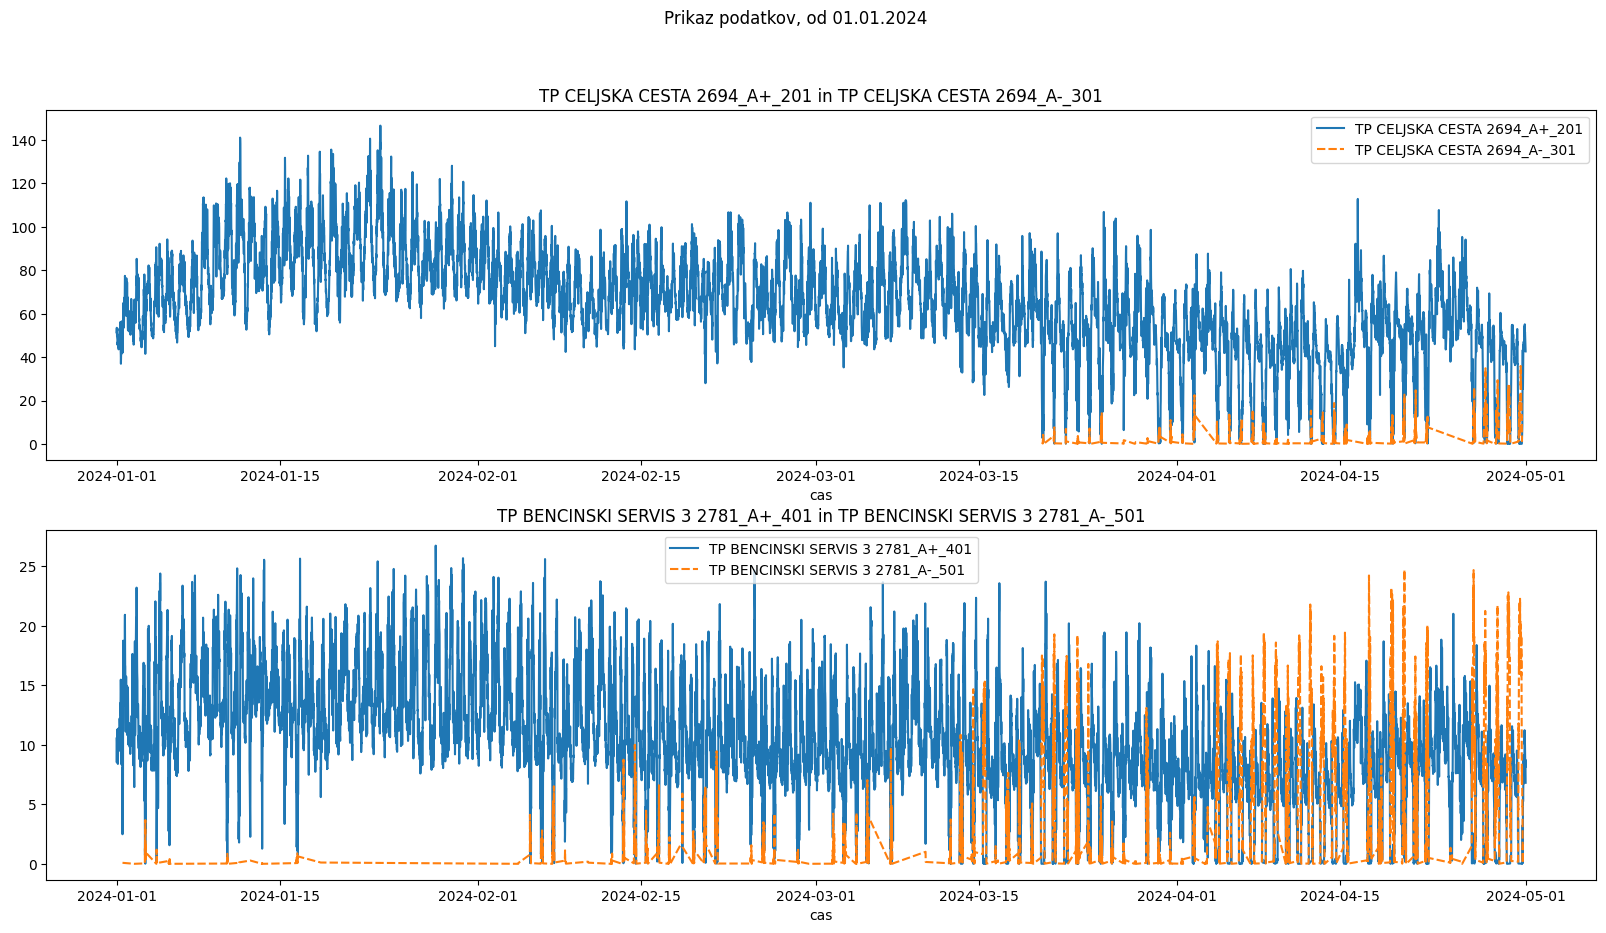

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
fig.suptitle('Prikaz podatkov, od 01.01.2024', fontsize=12)

df1 = df.iloc[:, 2:4].replace(0, np.nan)
sns.lineplot(df1, ax=ax1)
ax1.set_xlabel('cas', fontsize=10) 
ax1.title.set_text('TP CELJSKA CESTA 2694_A+_201 in TP CELJSKA CESTA 2694_A-_301')

df2 = df.iloc[:, 4:6].replace(0, np.nan)
sns.lineplot(df2, ax=ax2)
ax2.set_xlabel('cas', fontsize=10) 
ax2.title.set_text('TP BENCINSKI SERVIS 3 2781_A+_401 in TP BENCINSKI SERVIS 3 2781_A-_501')

plt.show()

## Podatki za 1 mesec pri postaji *TP BENCINSKI SERVIS 3 2781_A+_401*

In [29]:
# si izberem podatke za 1 mesec
df = data_A[(data_A["TP BENCINSKI SERVIS 3 2781_A+_401"].index >= "2023-02-01") &
                (data_A["TP BENCINSKI SERVIS 3 2781_A+_401"].index < "2023-03-01")][["TP BENCINSKI SERVIS 3 2781_A+_401"]]
df["time"] = df.index
df["id"] = 1
df.columns = ["y", "time", "id"]

### Opisne statistike

In [38]:
df.describe()

,y,id
count,2688.000000,2688.0
mean,13.520384,1.0
std,4.205261,0.0
min,6.012000,1.0
25%,10.041000,1.0
50%,13.110000,1.0
75%,16.584000,1.0
max,28.068000,1.0


### Grafični prikaz

Text(0.5, 0.98, 'Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ, obdobje 01.02.2023-01.03.2023')

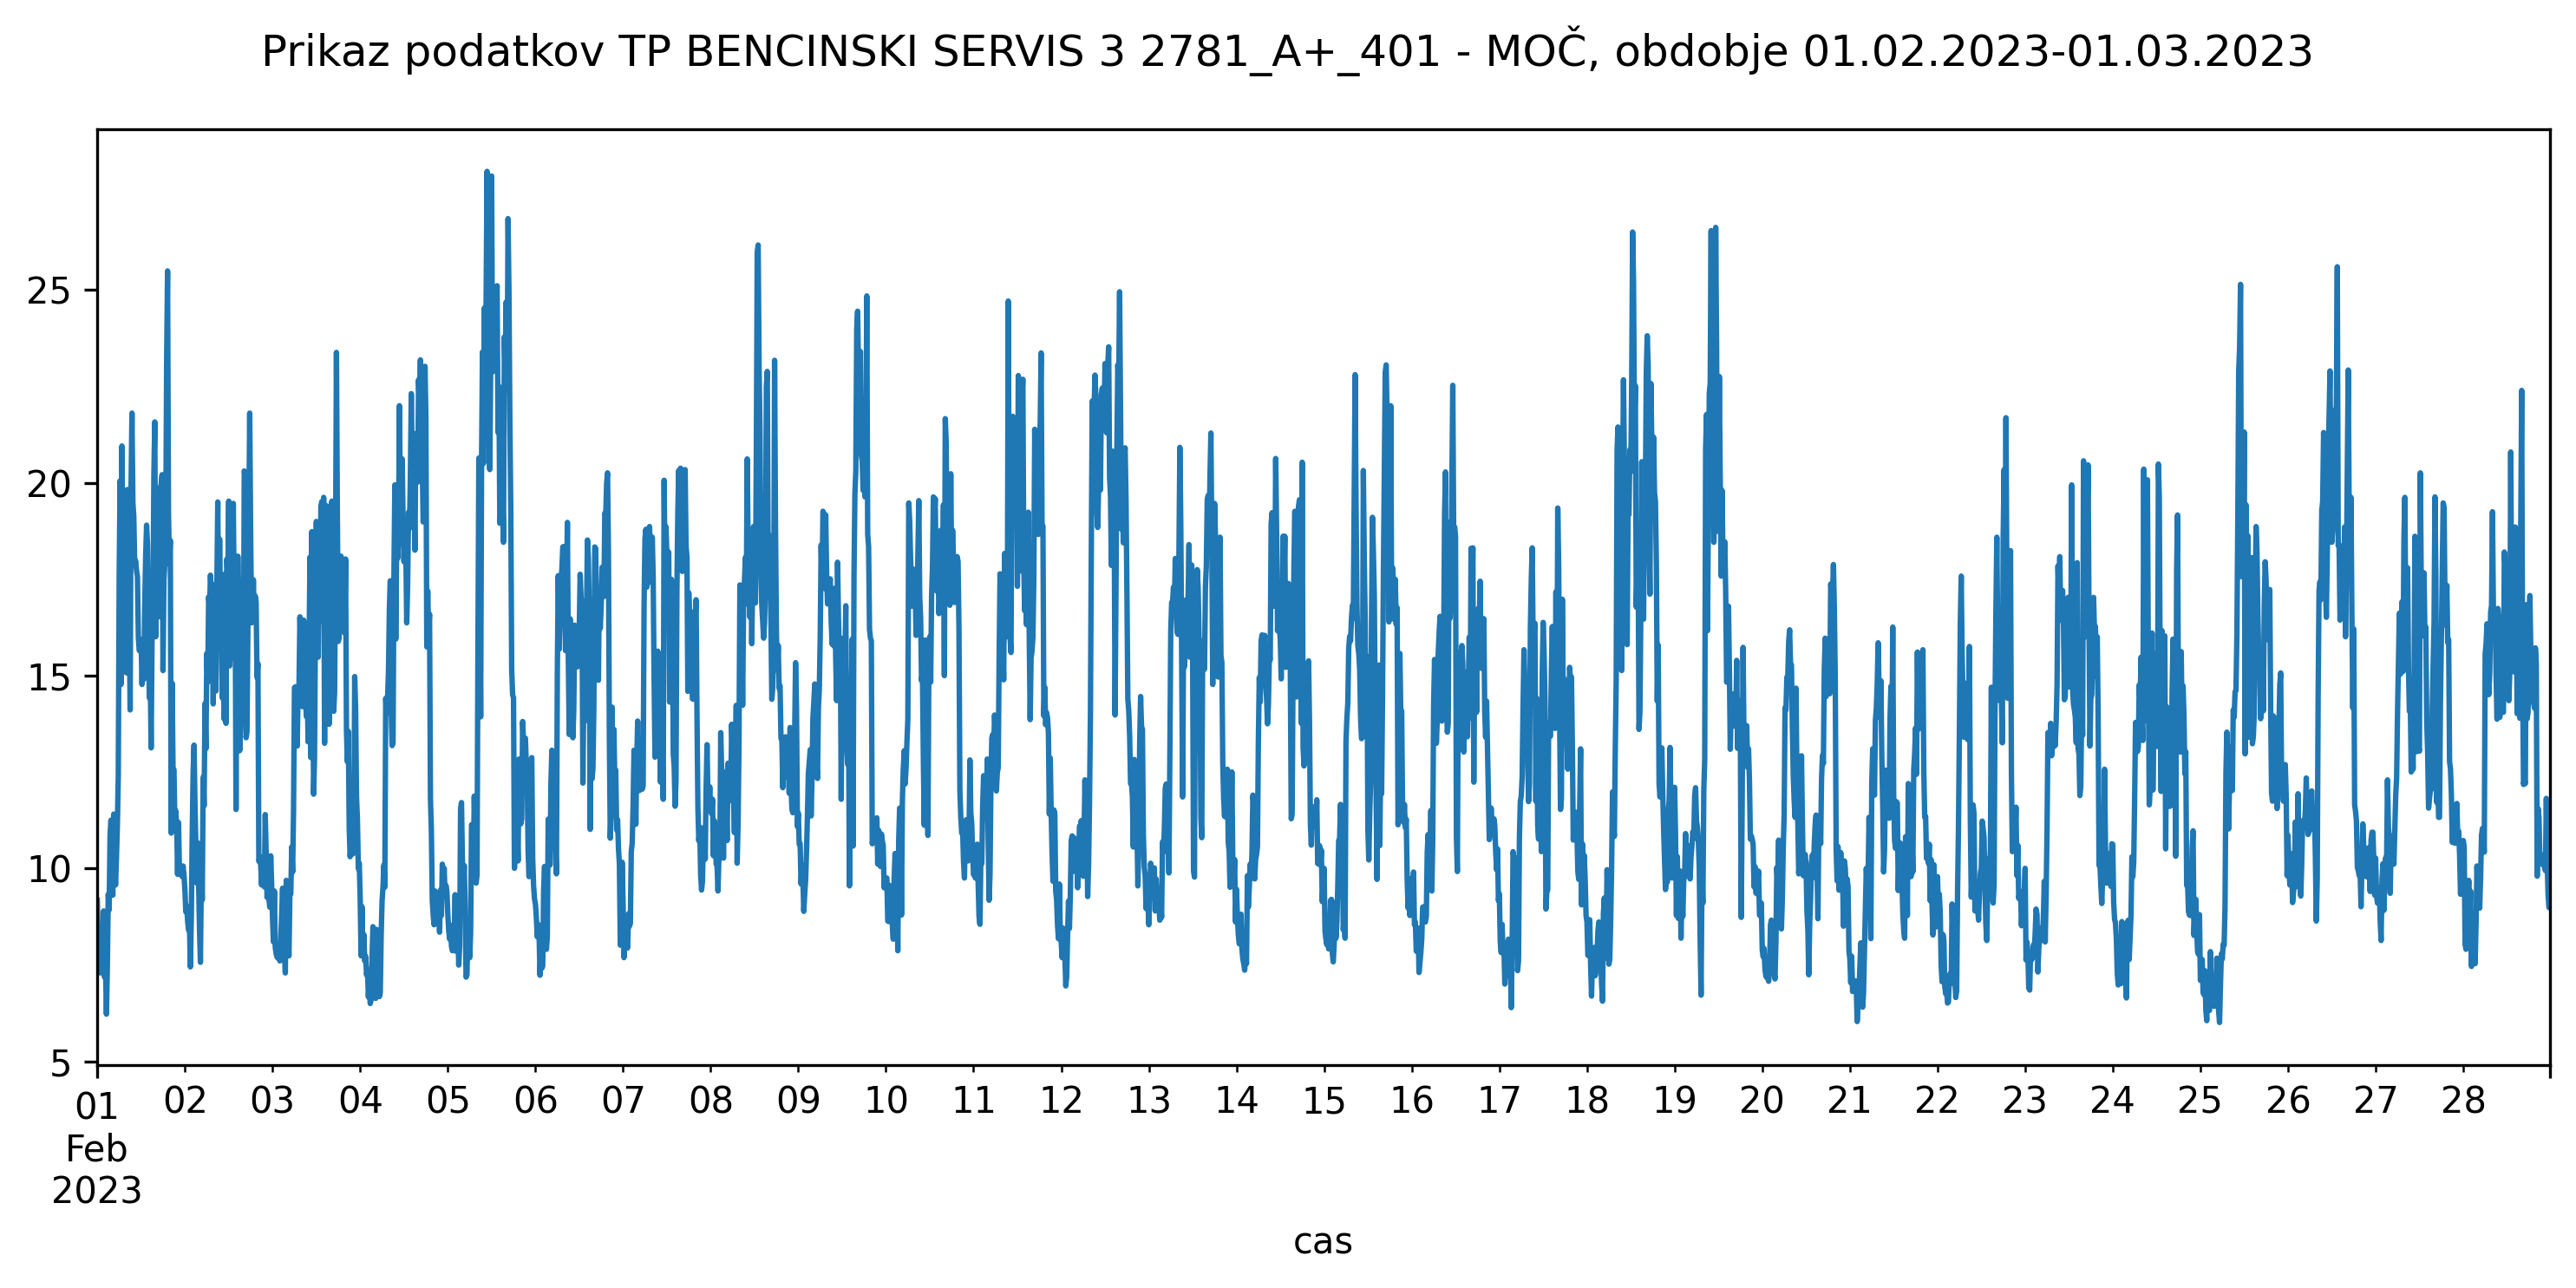

In [37]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
y = df['y']
y.plot()
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ, obdobje 01.02.2023-01.03.2023', fontsize=12)

## Uvoz podatkov **SEEDS_TP_V**

### Opisne statistike

In [7]:
# uvoz podatkov
data_V = pd.read_csv("SEEDS_TP_V.csv", index_col=0).iloc[1:,:]
data_V = data_V.apply(pd.to_numeric)
data_V.index = pd.to_datetime(data_V.index, format="%d/%m/%Y %H:%M")
data_V.index = pd.date_range(start=data_V.index[0], periods=len(data_V), freq="15T")

# statistika
data_V.describe()

,TP PRELAZ 056_V_L1_001,TP PRELAZ 056_V_L2_101,TP PRELAZ 056_V_L3_201,TP CELJSKA CESTA 2694_V_L1_301,TP CELJSKA CESTA 2694_V_L2_401,TP CELJSKA CESTA 2694_V_L3_501,TP BENCINSKI SERVIS 3 2781_V_L1_601,TP BENCINSKI SERVIS 3 2781_V_L2_701,TP BENCINSKI SERVIS 3 2781_V_L3_801
count,46652.0,46652.0,46652.0,46652.000000,46652.000000,46652.000000,46652.000000,46652.000000,46652.000000
mean,0.0,0.0,0.0,236.244233,235.702905,235.903717,225.201025,224.662456,225.681934
std,0.0,0.0,0.0,2.916748,2.883753,2.907320,2.275955,2.211710,2.200454
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,235.480000,234.970000,235.150000,224.300000,223.800000,224.800000
50%,0.0,0.0,0.0,236.300000,235.750000,235.960000,225.300000,224.700000,225.700000
75%,0.0,0.0,0.0,237.100000,236.520000,236.750000,226.200000,225.600000,226.600000
max,0.0,0.0,0.0,239.540000,238.790000,239.250000,232.400000,231.300000,232.600000


### Vizualizacija celotnih podatkov

Text(0.5, 0.98, 'Prikaz vseh podatkov - NAPETOST')

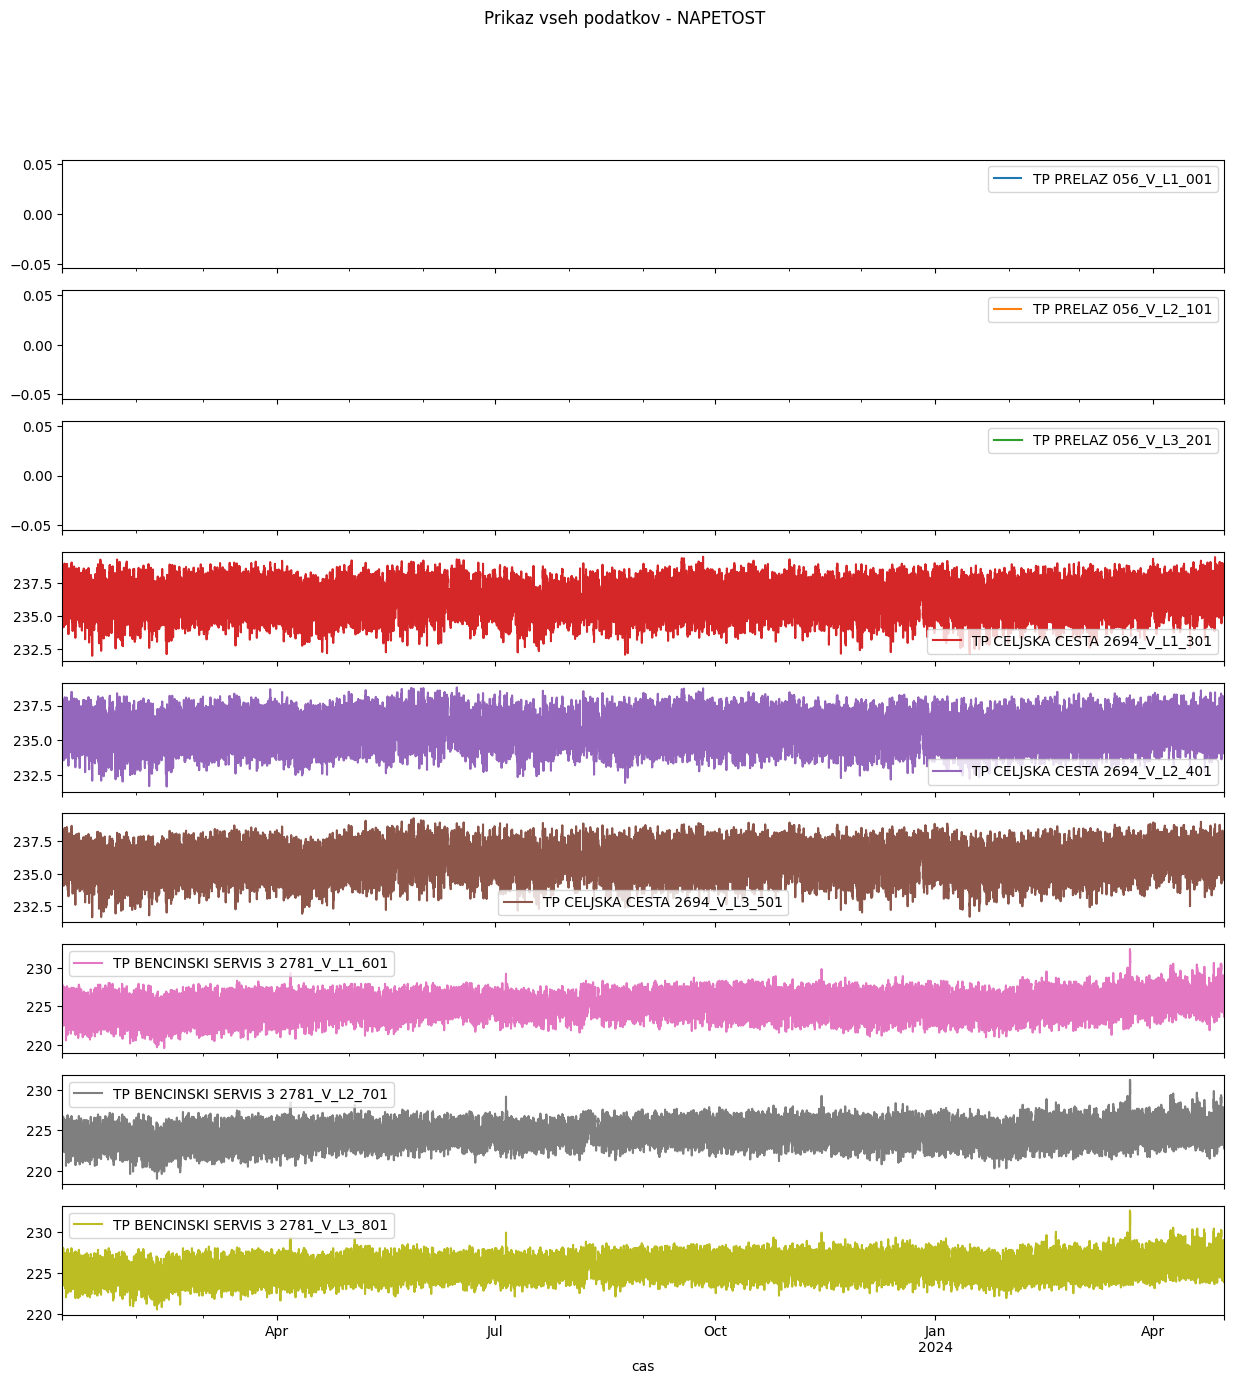

In [10]:
prikaz = data_V.replace(0, np.nan)
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(15, 15), sharex=True)
prikaz.plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz vseh podatkov - NAPETOST', fontsize=12) 

## Podatki za 1 mesec pri postajah 
- **TP CELJSKA CESTA 2694_V_L1_301**	
- **TP CELJSKA CESTA 2694_V_L2_401**	
- **TP CELJSKA CESTA 2694_V_L3_501**	
- **TP BENCINSKI SERVIS 3 2781_V_L1_601**	
- **TP BENCINSKI SERVIS 3 2781_V_L2_701**	
- **TP BENCINSKI SERVIS 3 2781_V_L3_801**

In [21]:
# si izberem podatke za 1 mesec
df = data_V.iloc[:,3:9]
df = df[(df.index >= "2023-02-01") & (df.index < "2023-03-01")]
df["time"] = df.index
df["id"] = 1
#df.columns = ["y", "time", "id"]

### Grafični prikaz

Text(0.5, 0.98, 'Prikaz podatkov - NAPETOST, obdobje 01.02.2023-01.03.2023')

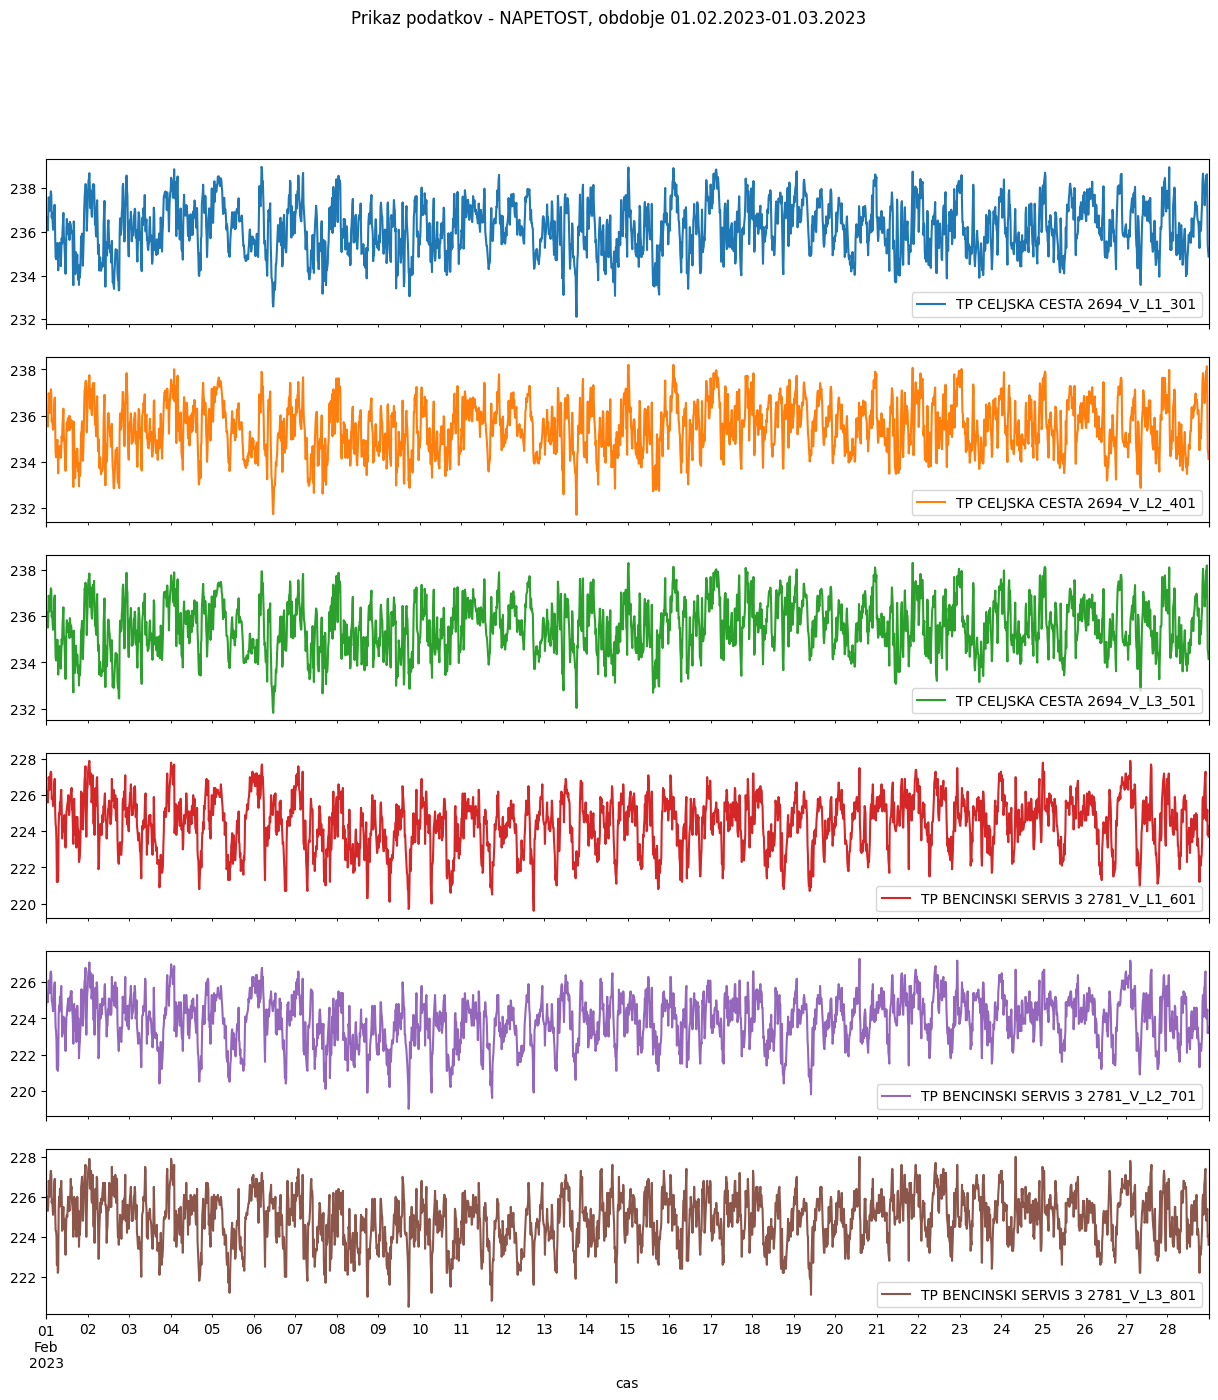

In [25]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 15), sharex=True)
df.drop(columns=['id', 'time']).plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov - NAPETOST, obdobje 01.02.2023-01.03.2023', fontsize=12) 


## Uvoz podatkov **SEEDS_I**

### Opisne statistike


In [30]:
# uvoz podatkov
data_I = pd.read_excel("SEEDS_I.xlsx", index_col=0).iloc[1:,:]
data_I = data_I.apply(pd.to_numeric)
data_I.index = pd.to_datetime(data_I.index, format="%d/%m/%Y %H:%M")
data_I.index = pd.date_range(start=data_I.index[0], periods=len(data_I), freq="15T")

# statistika
data_I.describe()

,TP PRELAZ 056_I_L1_001,TP PRELAZ 056_I_L2_101,TP PRELAZ 056_I_L3_201,TP CELJSKA CESTA 2694_I_L1_301,TP CELJSKA CESTA 2694_I_L2_401,TP CELJSKA CESTA 2694_I_L3_501,TP BENCINSKI SERVIS 3 2781_I_L1_601,TP BENCINSKI SERVIS 3 2781_I_L2_701,TP BENCINSKI SERVIS 3 2781_I_L3_801
count,46652.0,46652.0,46652.0,46652.000000,46652.000000,46652.000000,46652.000000,46652.000000,46652.000000
mean,0.0,0.0,0.0,77.306799,92.220355,92.396639,21.243629,17.056304,12.030069
std,0.0,0.0,0.0,24.754087,27.603511,30.873471,9.010051,6.147149,5.159742
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,59.200000,72.000000,69.600000,14.100000,12.600000,8.100000
50%,0.0,0.0,0.0,73.600000,88.800000,88.000000,19.800000,15.900000,10.800000
75%,0.0,0.0,0.0,92.000000,109.600000,111.200000,27.000000,20.700000,14.700000
max,0.0,0.0,0.0,206.400000,230.400000,219.200000,60.300000,49.500000,41.700000


### Vizualizacija celotnih podatkov


Text(0.5, 0.98, 'Prikaz vseh podatkov - TOK')

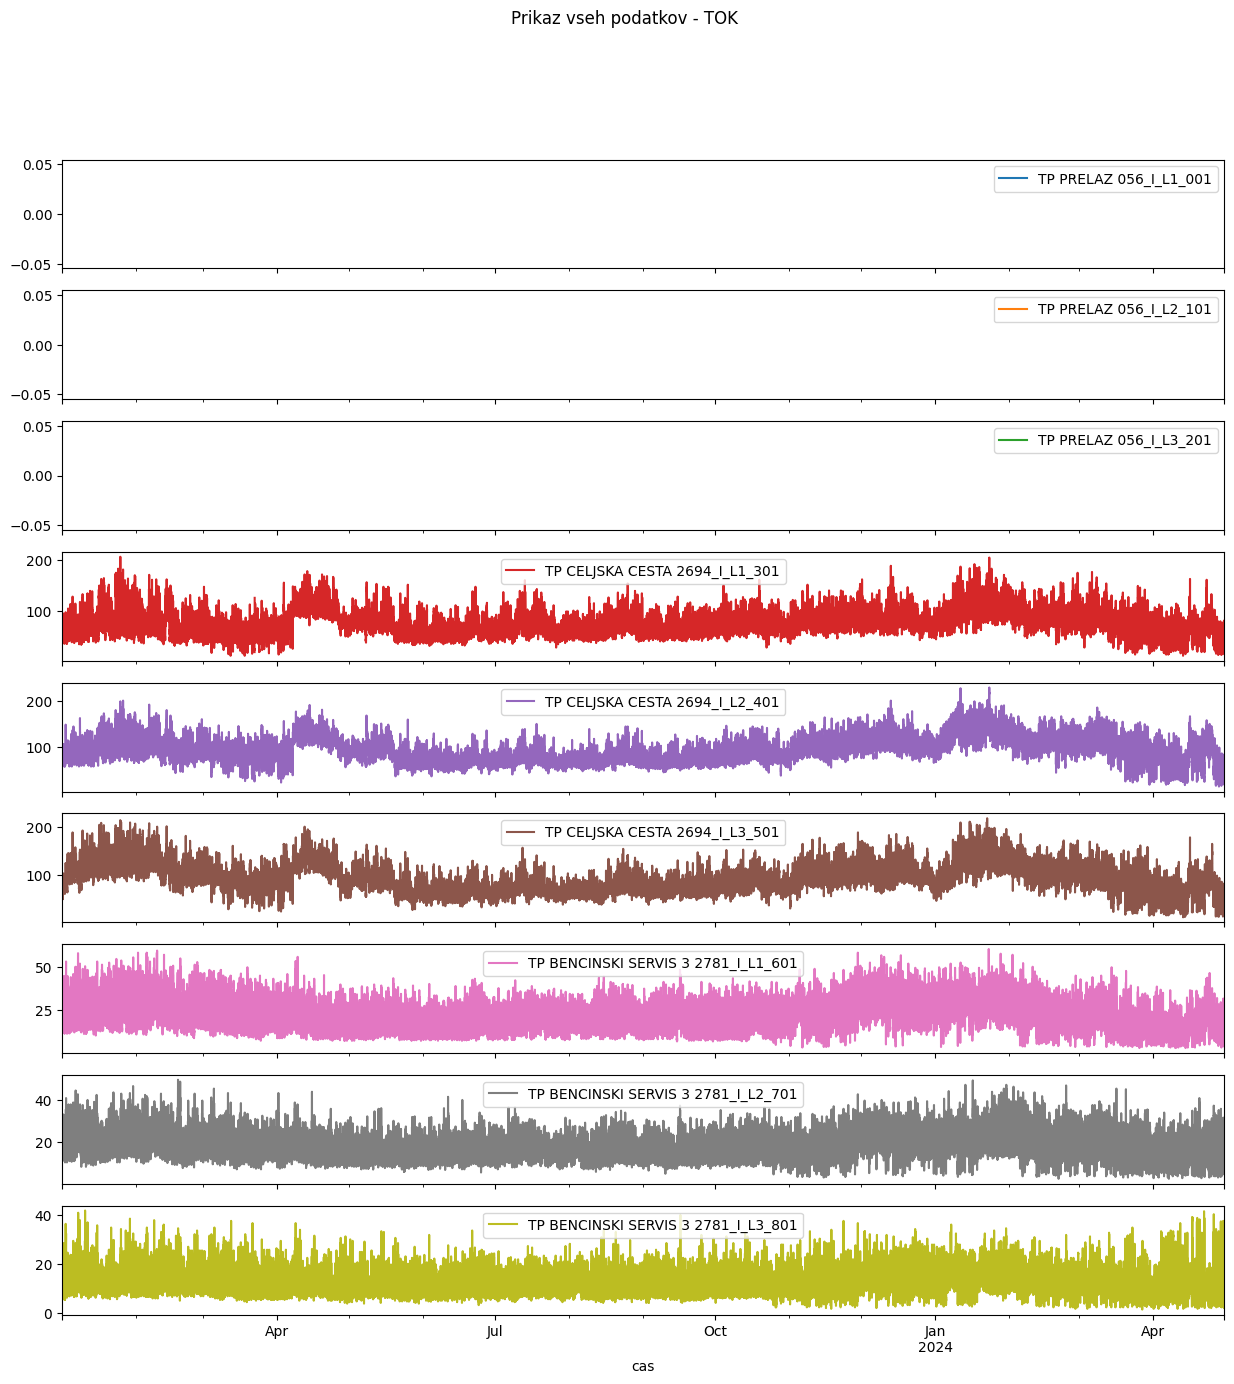

In [31]:
prikaz = data_I.replace(0, np.nan)
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(15, 15), sharex=True)
prikaz.plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz vseh podatkov - TOK', fontsize=12) 

## Podatki za 1 mesec pri postajah 
- **TP CELJSKA CESTA 2694_I_L1_301**
- **TP CELJSKA CESTA 2694_I_L2_401**	
- **TP CELJSKA CESTA 2694_I_L3_501**	
- **TP BENCINSKI SERVIS 3 2781_I_L1_601**	
- **TP BENCINSKI SERVIS 3 2781_I_L2_701**	
- **TP BENCINSKI SERVIS 3 2781_I_L3_801**


In [ ]:
# si izberem podatke za 1 mesec
df = data_I.iloc[:,3:9]
df = df[(df.index >= "2023-02-01") & (df.index < "2023-03-01")]
df["time"] = df.index
df["id"] = 1
#df.columns = ["y", "time", "id"]

### Grafični prikaz


Text(0.5, 0.98, 'Prikaz podatkov - NAPETOST, obdobje 01.02.2023-01.03.2023')

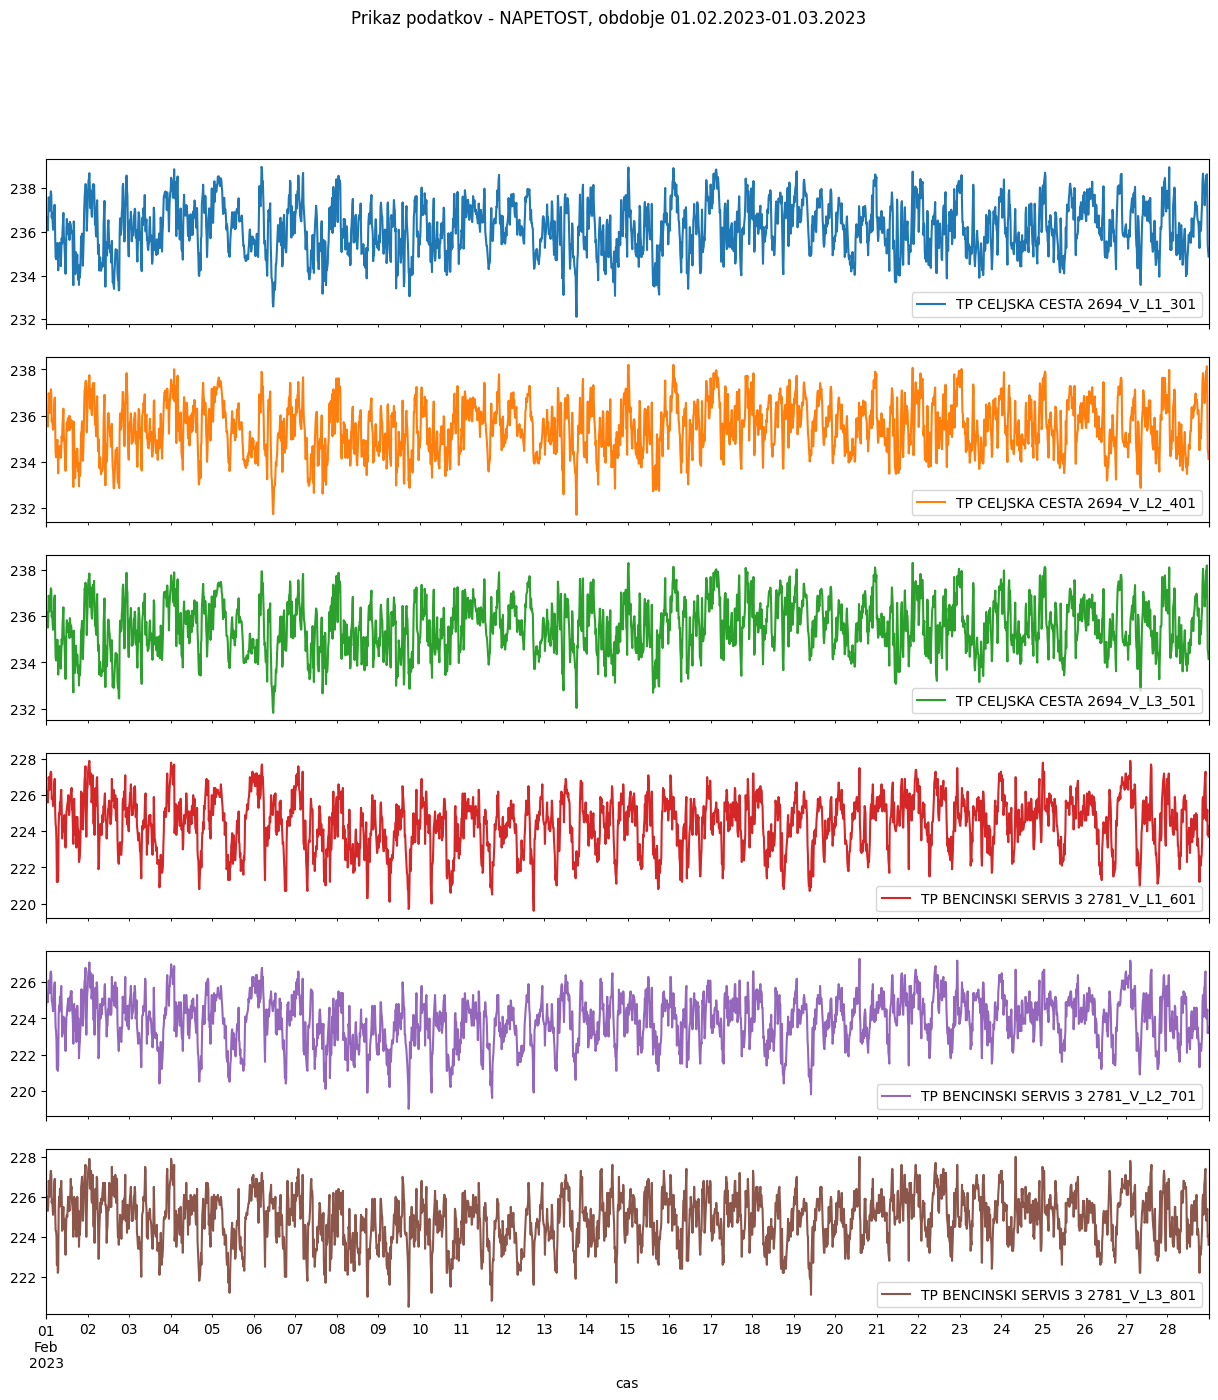

In [32]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 15), sharex=True)
df.drop(columns=['id', 'time']).plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov - NAPETOST, obdobje 01.02.2023-01.03.2023', fontsize=12) 


## Uvoz podatkov **SEEDS_R+_R-**

### Opisne statistike

 

In [44]:
# uvoz podatkov
data_R = pd.read_excel("SEEDS_R+_R-.xlsx", index_col=0).iloc[1:,:]
data_R = data_R.apply(pd.to_numeric)
data_R.index = pd.to_datetime(data_R.index, format="%d/%m/%Y %H:%M")
data_R.index = pd.date_range(start=data_R.index[0], periods=len(data_R), freq="15T")

# statistika
data_R.describe()

,TP PRELAZ 056_R+_001,TP PRELAZ 056_R-_101,TP CELJSKA CESTA 2694_R+_201,TP CELJSKA CESTA 2694_R-_301,TP BENCINSKI SERVIS 3 2781_R+_401,TP BENCINSKI SERVIS 3 2781_R-_501
count,46652.0,46652.0,46652.000000,46652.000000,46652.000000,46652.000000
mean,0.0,0.0,3.275896,2.847768,1.440572,0.128397
std,0.0,0.0,5.542210,3.082650,1.656751,0.198536
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.168000,0.000000
50%,0.0,0.0,0.240000,1.920000,0.612000,0.024000
75%,0.0,0.0,4.640000,4.720000,2.592000,0.192000
max,0.0,0.0,43.280000,15.600000,10.920000,3.084000


### Vizualizacija celotnih podatkov

Text(0.5, 0.98, 'Prikaz vseh podatkov')

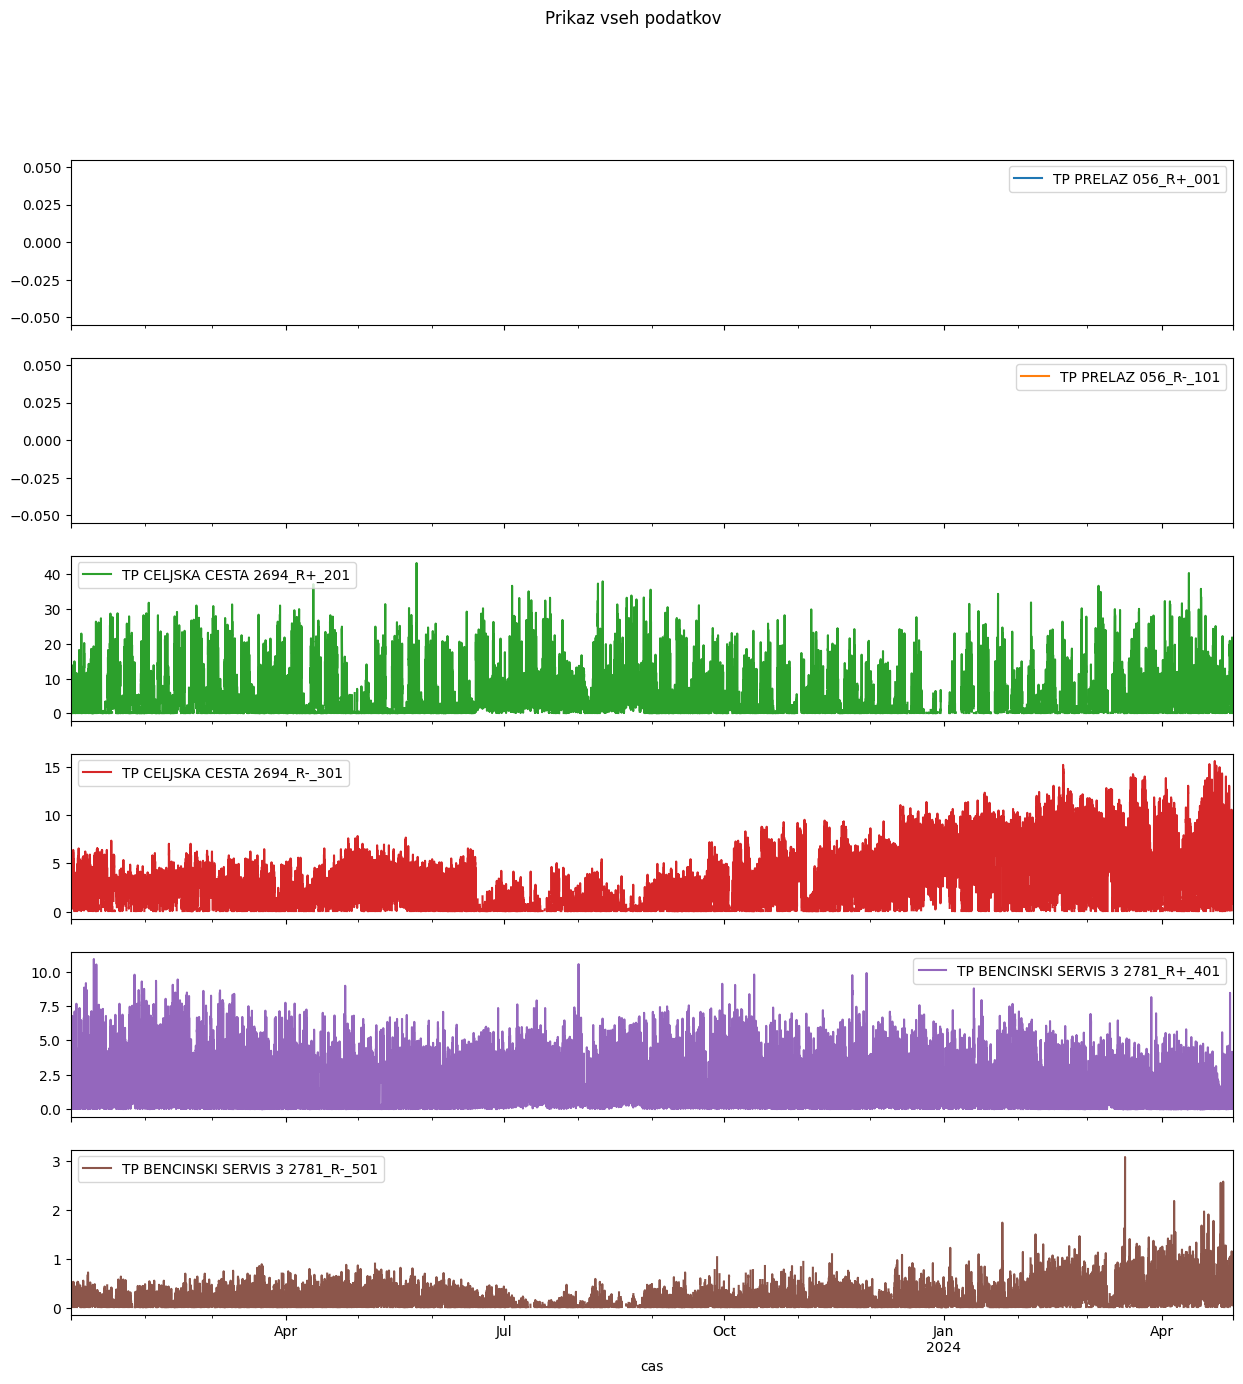

In [35]:
prikaz = data_R.replace(0, np.nan)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 15), sharex=True)
prikaz.plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz vseh podatkov', fontsize=12) 

## Podatki za 1 mesec pri postajah 
- **TP CELJSKA CESTA 2694_R+_201**	
- **TP CELJSKA CESTA 2694_R-_301**	
- **TP BENCINSKI SERVIS 3 2781_R+_401**	
- **TP BENCINSKI SERVIS 3 2781_R-_50**

In [72]:
# si izberem podatke za 1 mesec
df = data_R.iloc[:,2:6]
df = df[(df.index >= "2023-02-01") & (df.index < "2023-03-01")]
df["time"] = df.index
df["id"] = 1
#df.columns = ["y", "time", "id"]

### Grafični prikaz

Text(0.5, 0.98, 'Prikaz podatkov, obdobje 01.02.2023-01.03.2023')

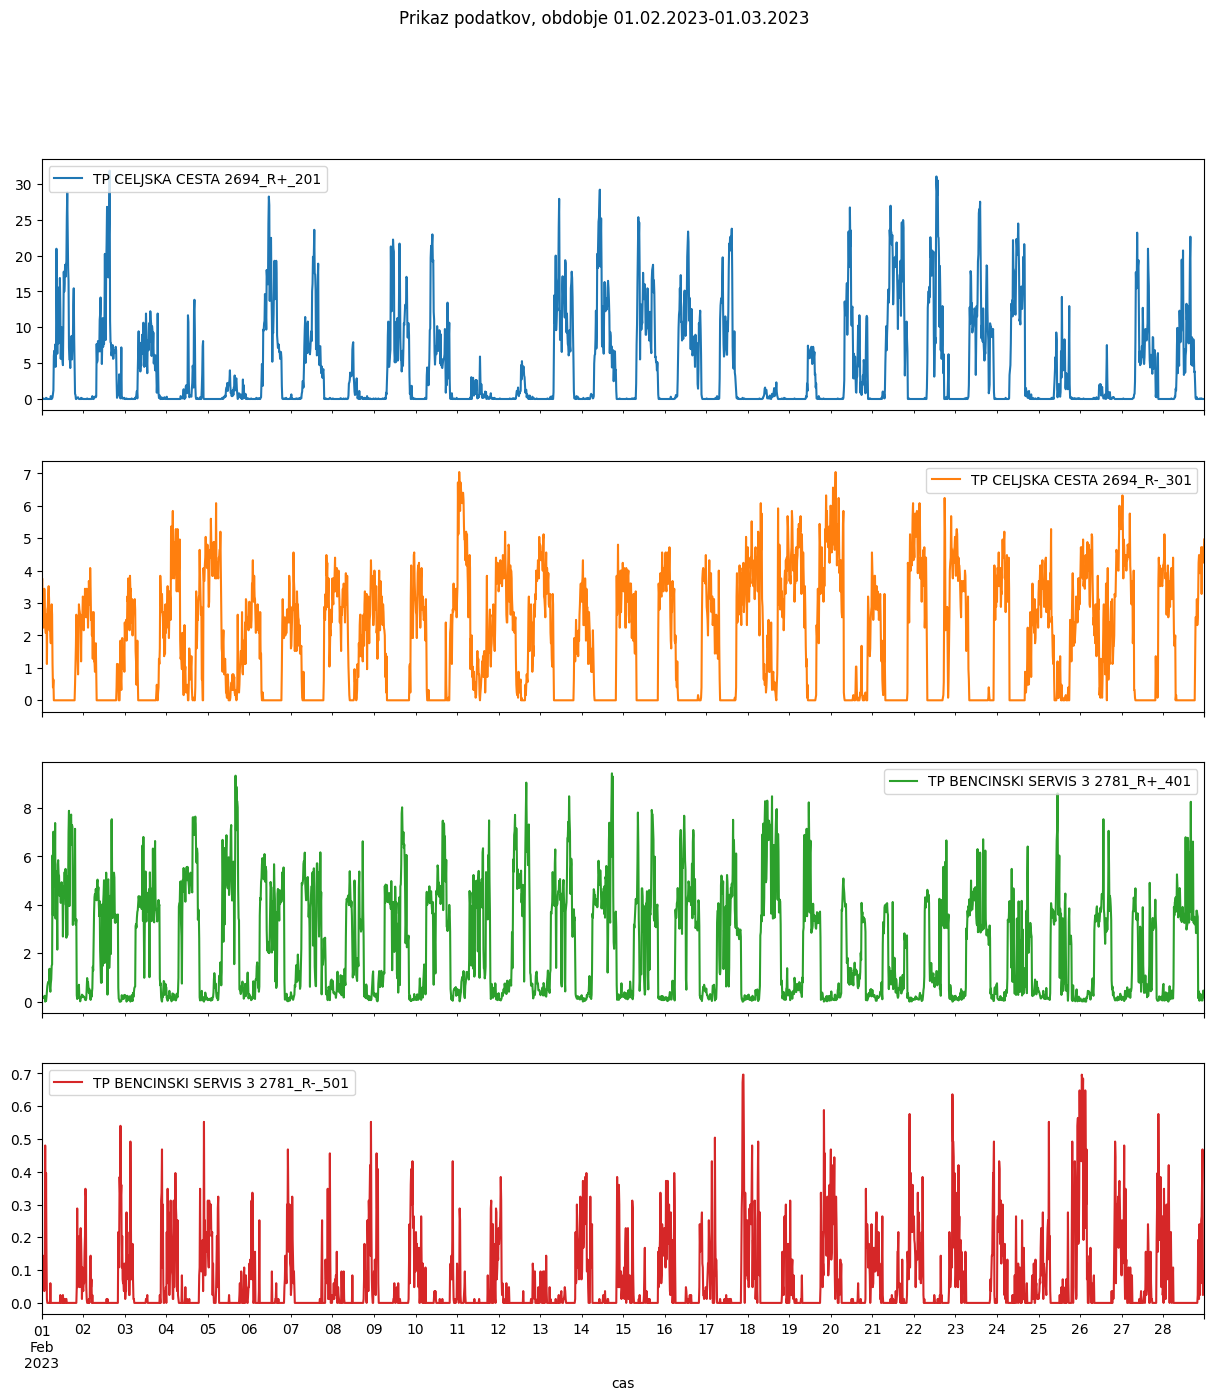

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex=True)
df.drop(columns=['id', 'time']).plot(subplots=True, ax=axes)
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov, obdobje 01.02.2023-01.03.2023', fontsize=12)

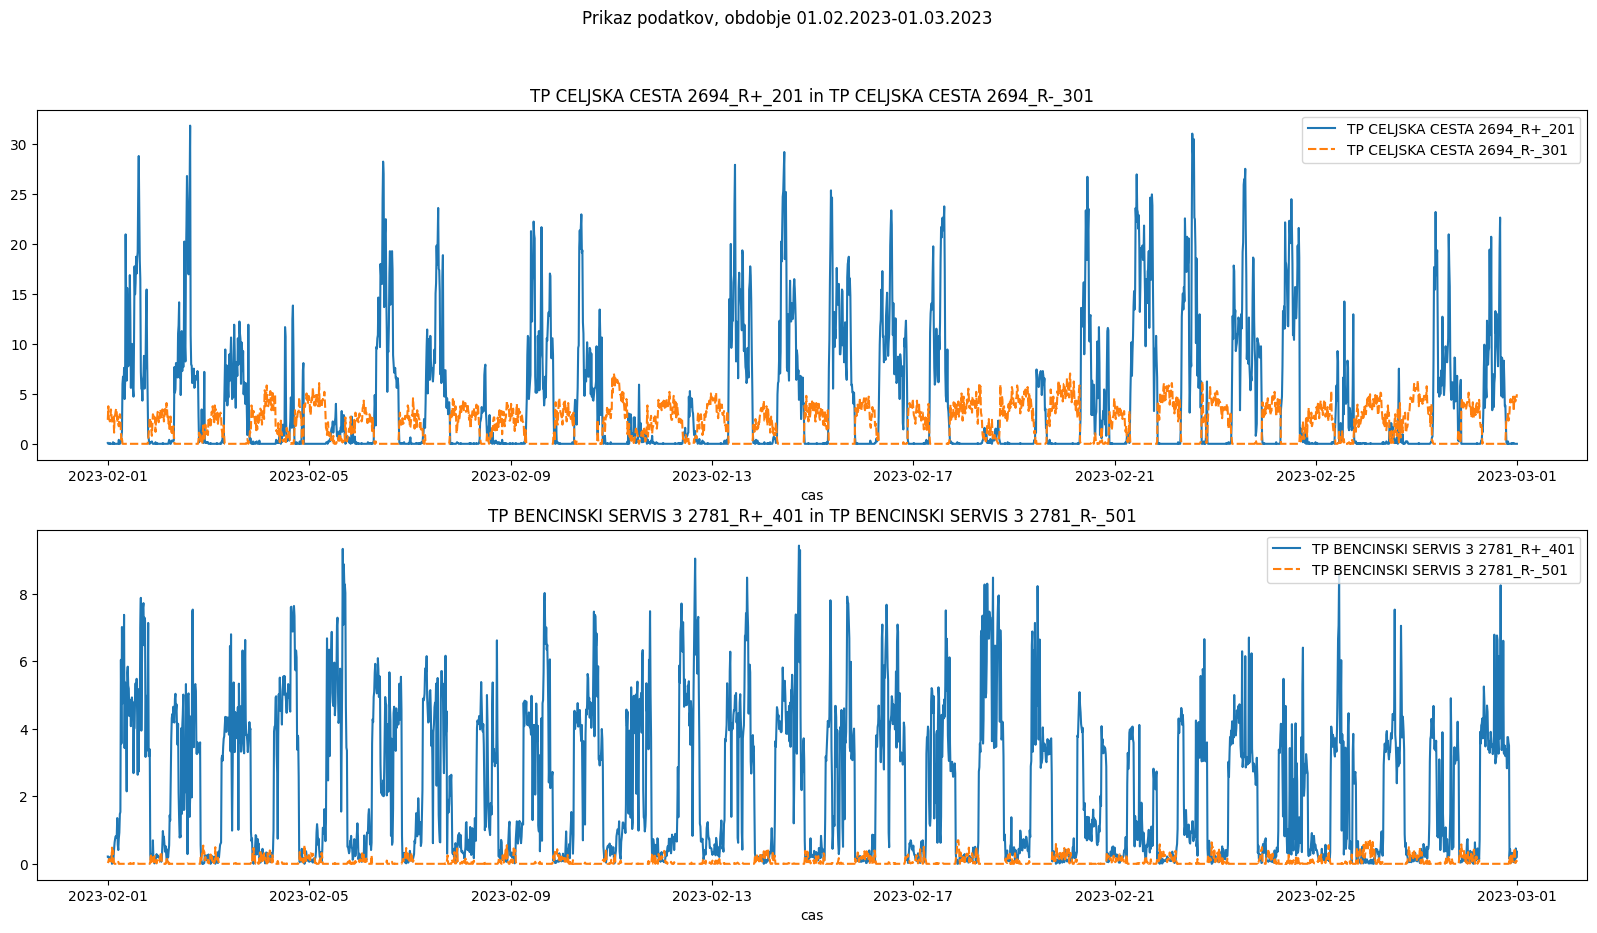

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
fig.suptitle('Prikaz podatkov, obdobje 01.02.2023-01.03.2023', fontsize=12)

df1 = df.iloc[:, 0:2]
sns.lineplot(df1, ax=ax1)
ax1.set_xlabel('cas', fontsize=10) 
ax1.title.set_text('TP CELJSKA CESTA 2694_R+_201 in TP CELJSKA CESTA 2694_R-_301')

df2 = df.iloc[:, 2:4]
sns.lineplot(df2, ax=ax2)
ax2.set_xlabel('cas', fontsize=10) 
ax2.title.set_text('TP BENCINSKI SERVIS 3 2781_R+_401 in TP BENCINSKI SERVIS 3 2781_R-_501')

plt.show()